<ipython-input-2-159b9784f7b1>:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=col_names, engine="python")
<ipython-input-2-159b9784f7b1>:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=col_names, engine="python")


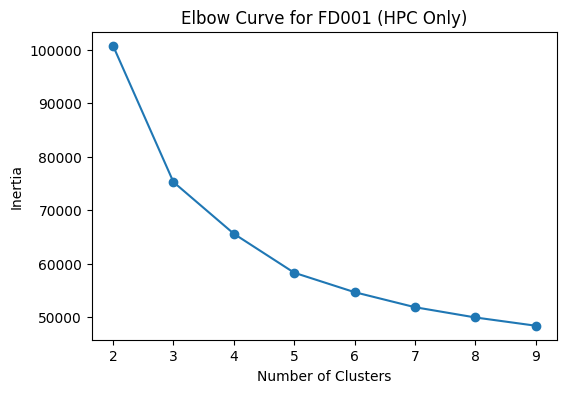

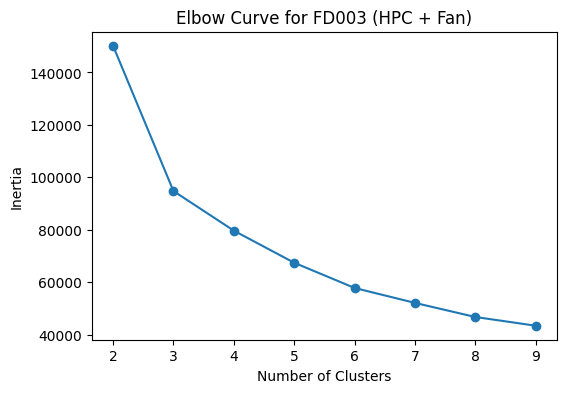

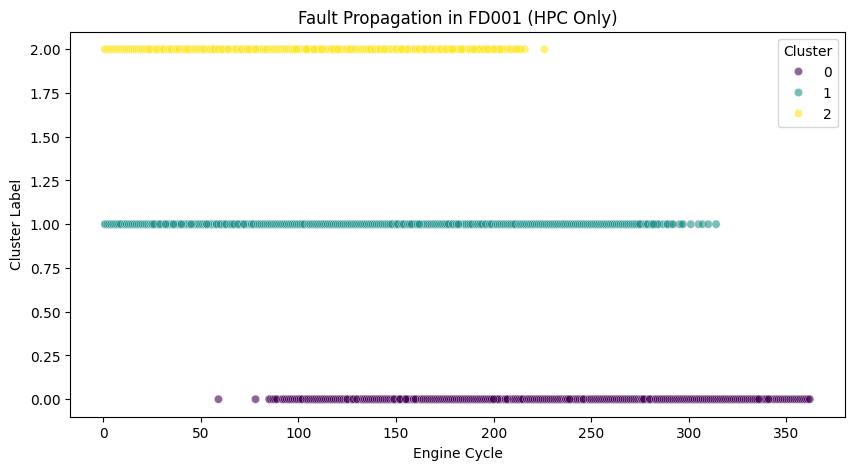

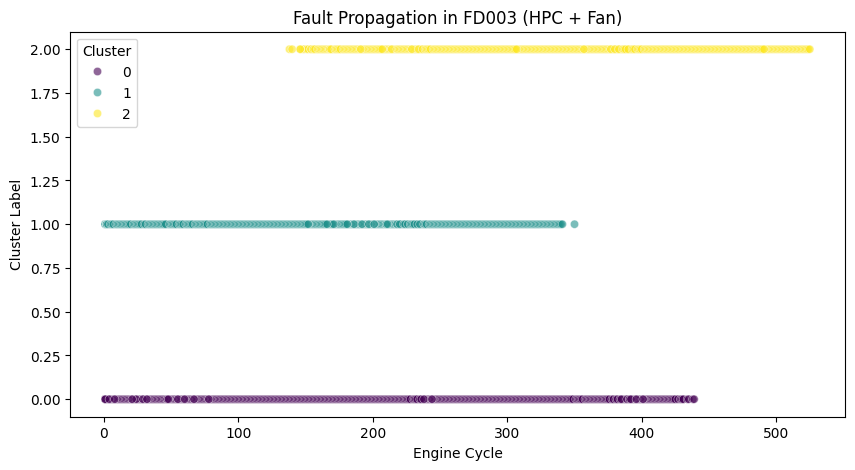

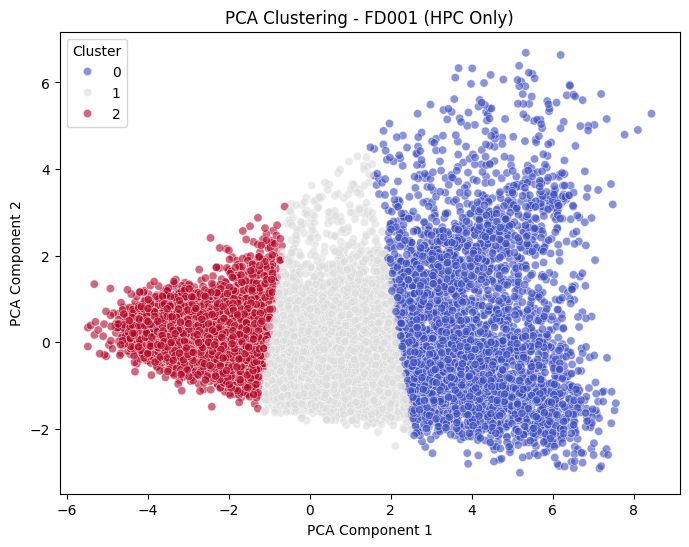

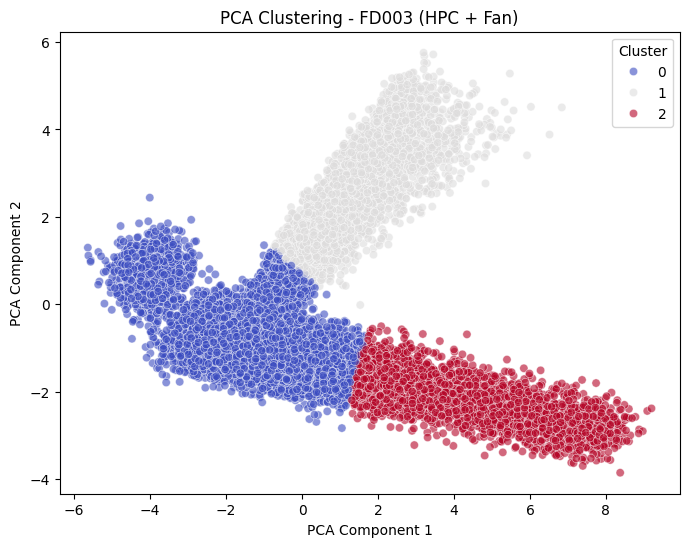

In [ ]:
Timport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Load Dataset
def load_data(file_path):
    """Load CMAPSS dataset (FD001 - FD004) and assign column names"""
    col_names = ["Engine_ID", "Cycle", "Altitude", "Mach", "TRA",
                 "T2", "T24", "T30", "T50", "P2", "P15", "P30",
                 "Nf", "Nc", "epr", "Ps30", "phi", "NRf", "NRc",
                 "BPR", "farB", "htBleed", "Nf_dmd", "PCNfR_dmd",
                 "W31", "W32"]

    df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=col_names, engine="python")
    df = df.dropna(axis=1, how='all')  # Remove empty columns from space-separated data
    return df

# Load all datasets
df1 = load_data("/content/drive/MyDrive/data/MSC/train_FD001.txt")  # HPC Only
df3 = load_data("/content/drive/MyDrive/data/MSC/train_FD003.txt")  # HPC + Fan

# Step 2: Select Key Features (HPC & Fan related)
features = ["T30", "T50", "P30", "Ps30", "Nf", "Nc", "BPR", "phi", "T24"]

df1_selected = df1[features]
df3_selected = df3[features]



# Step 3: Normalize the Data
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)
df3_scaled = scaler.fit_transform(df3_selected)


# Step 4: Determine Optimal Clusters using Elbow Method
def plot_elbow_curve(data, title):
    inertia = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(6,4))
    plt.plot(range(2, 10), inertia, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title(title)
    plt.show()

plot_elbow_curve(df1_scaled, "Elbow Curve for FD001 (HPC Only)")
plot_elbow_curve(df3_scaled, "Elbow Curve for FD003 (HPC + Fan)")


# Step 5: Apply K-Means Clustering
def apply_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    return labels

df1["Cluster"] = apply_kmeans(df1_scaled, n_clusters=3)
df3["Cluster"] = apply_kmeans(df3_scaled, n_clusters=3)

# Step 6: Visualize Clusters Over Time (Engine Cycles)
def plot_clusters_over_time(df, dataset_name):
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df["Cycle"], y=df["Cluster"], hue=df["Cluster"], palette="viridis", alpha=0.6)
    plt.xlabel("Engine Cycle")
    plt.ylabel("Cluster Label")
    plt.title(f"Fault Propagation in {dataset_name}")
    plt.show()

plot_clusters_over_time(df1, "FD001 (HPC Only)")
plot_clusters_over_time(df3, "FD003 (HPC + Fan)")

# Step 7: PCA for Visualization
def plot_pca_clusters(data, labels, title):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    plt.figure(figsize=(8,6))
    sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=labels, palette="coolwarm", alpha=0.6)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.show()

plot_pca_clusters(df1_scaled, df1["Cluster"], "PCA Clustering - FD001 (HPC Only)")
plot_pca_clusters(df3_scaled, df3["Cluster"], "PCA Clustering - FD003 (HPC + Fan)")


In [ ]:

df1.head()

,Engine_ID,Cycle,Altitude,Mach,TRA,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Cluster
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,1
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,1
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,1
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,1
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,1


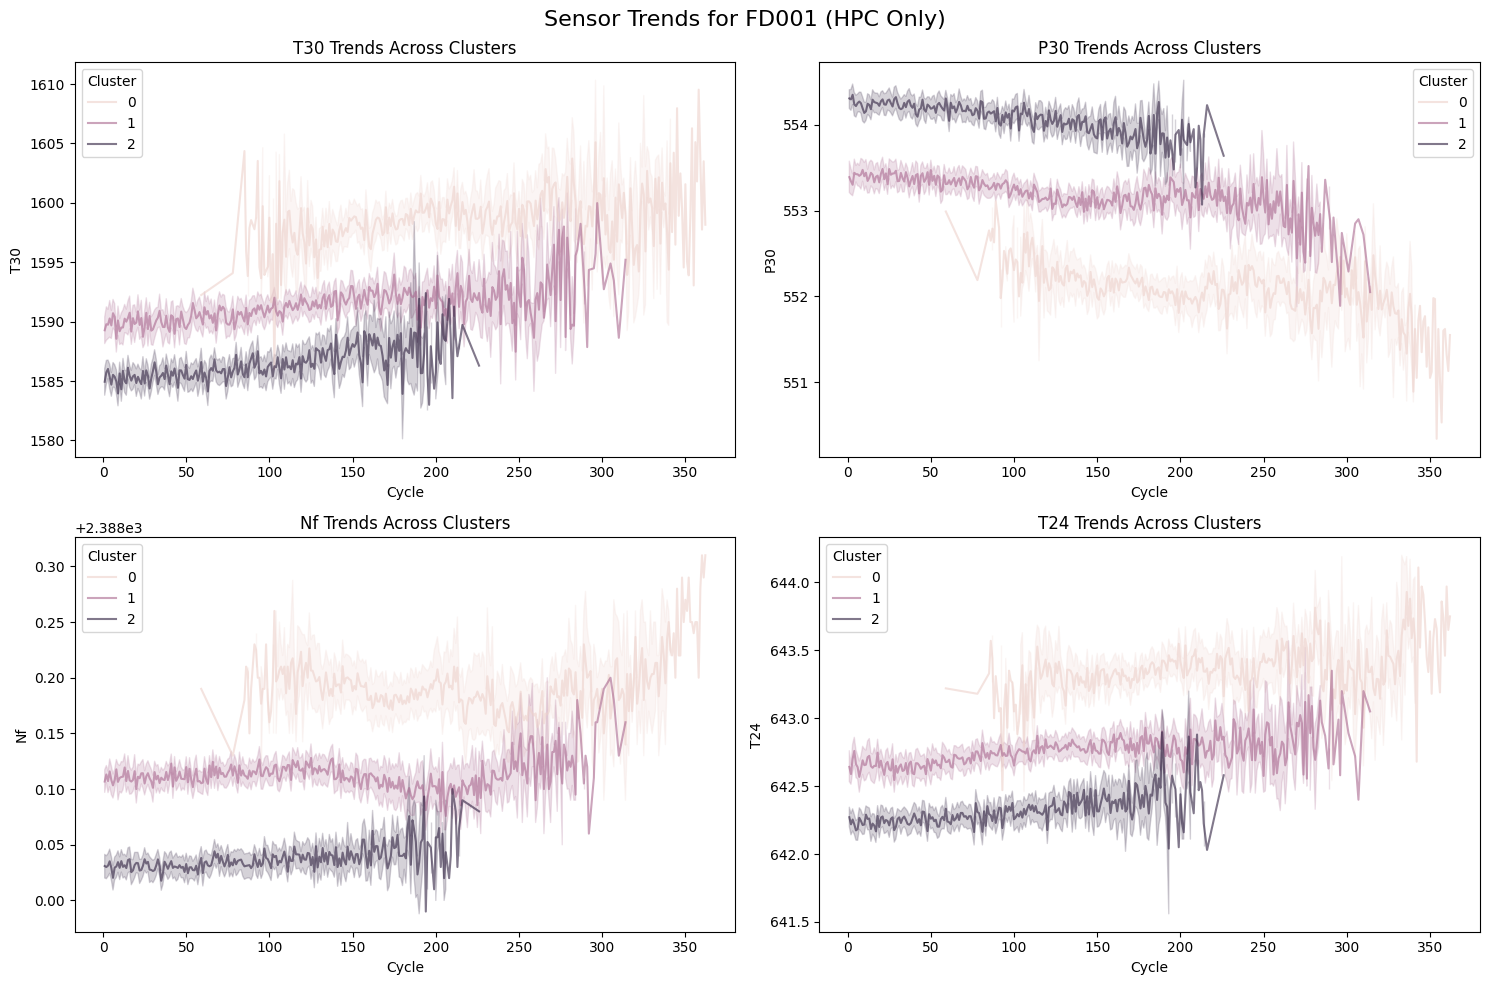

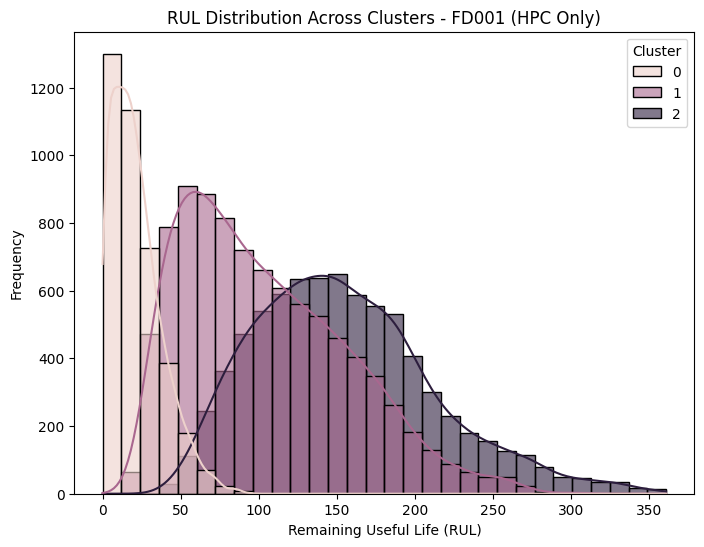

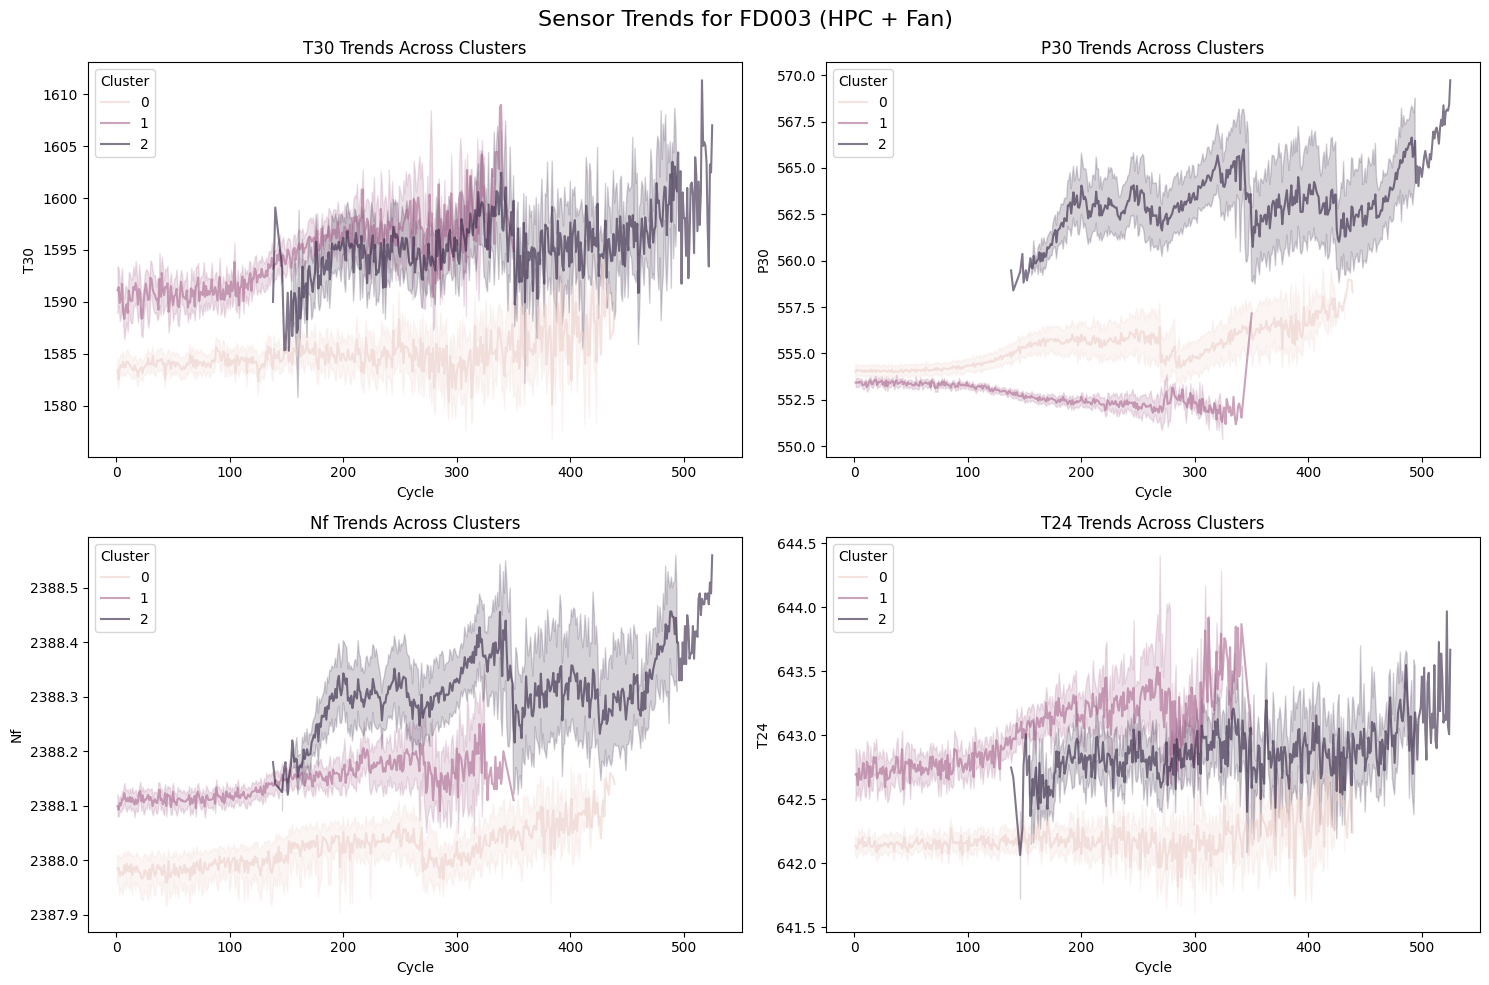

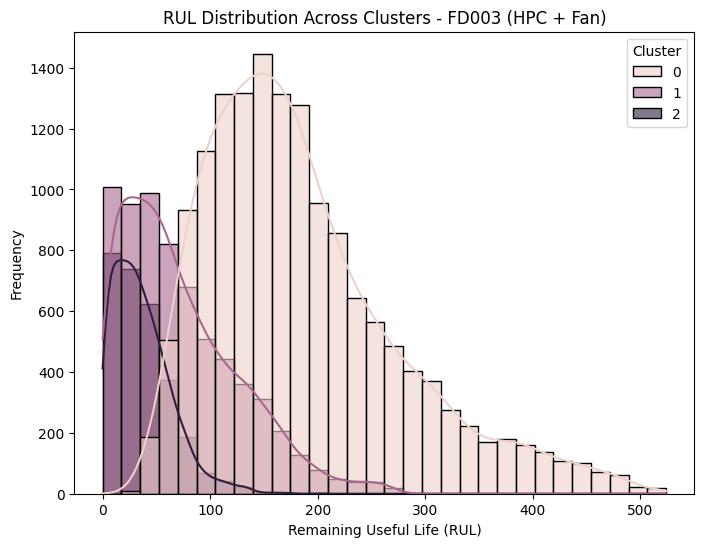

In [ ]:
sensor_cols = ["T30", "P30", "Nf", "T24"]
max_cycles = df1.groupby('Engine_ID')['Cycle'].transform('max')
max_cycles1 = df3.groupby('Engine_ID')['Cycle'].transform('max') #"BPR","phi", "Ps30", "Nc"
df1['RUL'] = max_cycles - df1['Cycle'].round(0).astype(int)
df3['RUL'] = max_cycles1 -df3['Cycle'].round(0).astype(int)

# Function to plot sensor trends across clusters
def plot_sensor_trends(df, title):
    plt.figure(figsize=(15, 10))
    for i, sensor in enumerate(sensor_cols, 1):
        plt.subplot(2, 2, i)
        sns.lineplot(data=df, x="Cycle", y=sensor, hue="Cluster", alpha=0.6)
        plt.title(f"{sensor} Trends Across Clusters")
        plt.xlabel("Cycle")
        plt.ylabel(sensor)
        plt.legend(title="Cluster")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Function to plot RUL distribution across clusters
def plot_rul_distribution(df, title):
  plt.figure(figsize=(8, 6))
  ax=sns.histplot(data=df, x="RUL", hue="Cluster", kde=True, bins=30, alpha=0.6)
  plt.title(f"RUL Distribution Across Clusters - {title}")
  plt.xlabel("Remaining Useful Life (RUL)")
  plt.ylabel("Frequency")
  # Manually set legend
  handles, labels = ax.get_legend_handles_labels()
  if handles:
    plt.legend(handles=handles, labels=labels, title="Cluster")

  plt.show()

# Run analysis for FD001
plot_sensor_trends(df1, "Sensor Trends for FD001 (HPC Only)")
plot_rul_distribution(df1, "FD001 (HPC Only)")

# Run analysis for FD003
plot_sensor_trends(df3, "Sensor Trends for FD003 (HPC + Fan)")
plot_rul_distribution(df3, "FD003 (HPC + Fan)")